# CLASSIFICATION ALGORITHMS

#### Definition:
In machine learning and statistics, classification is the problem of identifying to which of a set of categories a new observation belongs, on the basis of a training set of data containing observations whose category membership is known.

## WINE QUALITY DATA

### Description of the dataset:
The dataset is related to the red variant of Portuguese "Vinho Verde" wine which can be viewed as a classification data.Due to privacy only the physiochemical (inputs) and sensory (output) variables are available.The datset has a total of 11 attributes/variables plus an output variable(class) with 1599 instances/observations.The classes are ordered but not balanced.

### Attribute Information:
Input variables (based on physicochemical tests):\
   1 - fixed acidity\
   2 - volatile acidity\
   3 - citric acid\
   4 - residual sugar\
   5 - chlorides\
   6 - free sulfur dioxide\
   7 - total sulfur dioxide\
   8 - density\
   9 - pH\
   10 - sulphates\
   11 - alcohol\
   Output variable (based on sensory data): \
   12 - quality (score between 0 and 10)

In [1]:
# Importing necessary packages and functions required
import numpy as np # for numerical computations
import pandas as pd # for data processing,I/O file operations
import matplotlib.pyplot as plt # for visualization of different kinds of plots
%matplotlib inline 
# for matplotlib graphs to be included in the notebook, next to the code
import seaborn as sns # for visualization 
import warnings # to silence warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing red wine data into a dataframe
data=pd.read_csv("D:\\20-6-19\\PROJECTS\\WINE CLASSIFICATION\\winequality-red.csv")

In [3]:
# Glimpse of the data
data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1316,5.4,0.740,0.00,1.20,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6
1281,7.1,0.460,0.20,1.90,0.077,28.0,54.0,0.99560,3.37,0.64,10.4,6
346,6.6,0.815,0.02,2.70,0.072,17.0,34.0,0.99550,3.58,0.89,12.3,7
1031,7.3,0.550,0.01,1.80,0.093,9.0,15.0,0.99514,3.35,0.58,11.0,7
326,11.6,0.530,0.66,3.65,0.121,6.0,14.0,0.99780,3.05,0.74,11.5,7


In [4]:
#shape of the data i.e., no of rows and columns in the data
data.shape

(1599, 12)

In [5]:
#size of the data
data.size

19188

### Data Analysis and Visualization

In [6]:
# data information i.e., datatypes of different columns,their count etc
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
# Description of the data i.e., Descriptive Statistics
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
# checking the different classes of the wine quality 
data.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

We observe there are a total of 6 unique wine qualities in our data.

In [9]:
# Checking the number of supporting observations for each class of wine quality
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

The wine quality 5 has the maximum supporting cases in the data of 681 cases,while the wine qualities 3,8 have very less number of supporting cases of 10,18 respectively. 

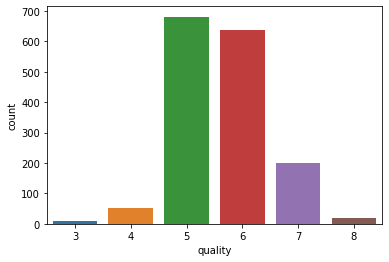

In [10]:
sns.countplot(data.quality)
plt.show()

From the above count plot we find that wines with normal quality(4,5,6,7) have more no of instances while the excellent or poor quality wines(8,3) respectively have less instances for support.

Since the classes are not balanced,we remove the classes with less supporting classes i.e, qualities 3, 8 as they hinder the learning process of the models while fitting the data which produces abnormal results.

In [11]:
# Get names of indexes for which column Age has value 30
indexNames1 = data[ (data['quality'] == 3) ].index
indexNames2 = data[ (data['quality'] == 8) ].index
 
# Delete these row indexes from dataFrame
data.drop(indexNames1, inplace=True)
data.drop(indexNames2,inplace=True)

In [12]:
# Checking the number of supporting observations for each class of wine quality
data['quality'].value_counts()

5    681
6    638
7    199
4     53
Name: quality, dtype: int64

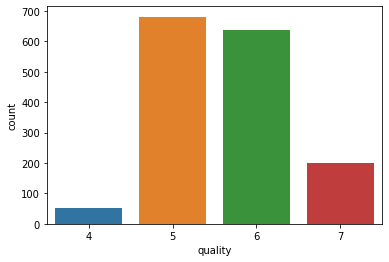

In [13]:
sns.countplot(data.quality)
plt.show()

Now each class have a decent number of supporting classes for the model to learn and classify a new one.

In [14]:
# Now lets see the shape of the data
data.shape

(1571, 12)

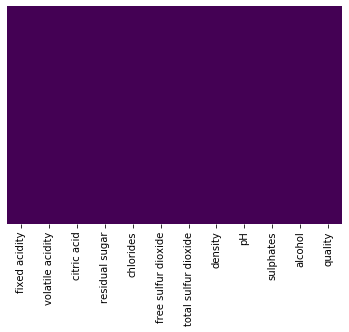

In [15]:
# Checking for missing values in the data
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap="viridis")
plt.show()

From the above heat map we observe that there are no missing values in the data.

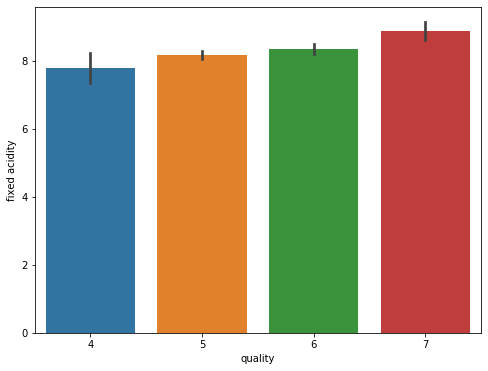

In [16]:
# Checking fixed acidity levels for each wine quality
fig = plt.figure(figsize = (8,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = data)

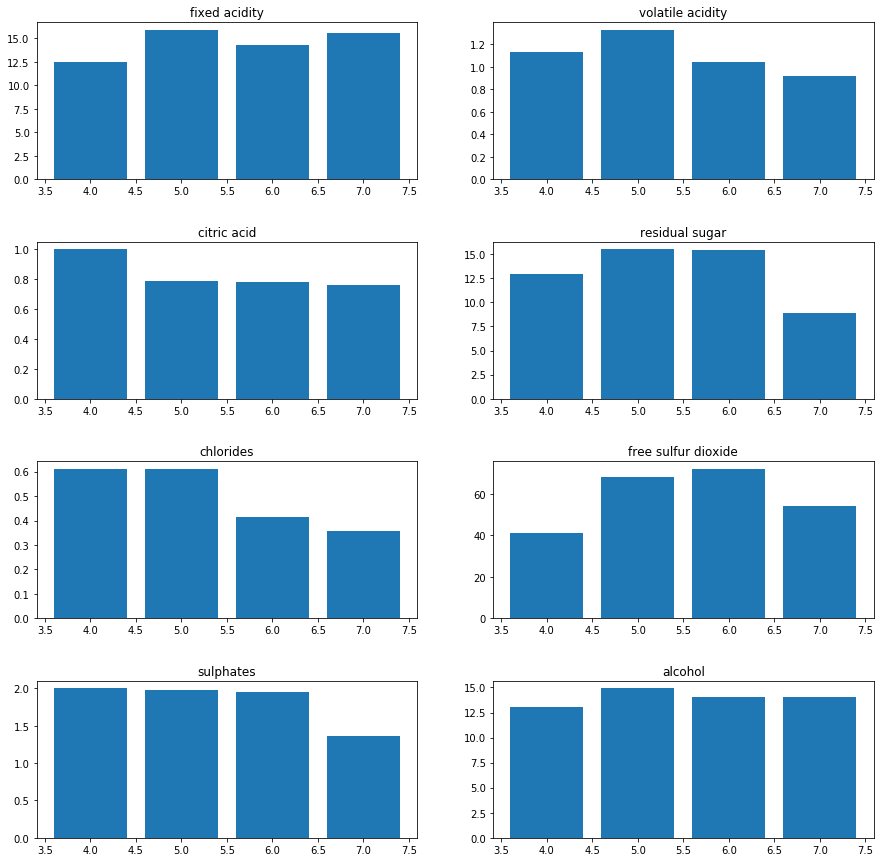

In [17]:
# Takes more run time can avoid this code if considered unnecessary.
fig,ax=plt.subplots(4,2,figsize=(15,15))
plt.subplots_adjust(hspace=.4)
ax[0,0].bar(x='quality',height='fixed acidity',data = data)
ax[0,1].bar(x="quality",height="volatile acidity",data=data)
ax[1,0].bar(x="quality",height="citric acid",data=data)
ax[1,1].bar(x="quality",height="residual sugar",data=data)
ax[2,0].bar(x="quality",height="chlorides",data=data)
ax[2,1].bar(x="quality",height="free sulfur dioxide",data=data)
ax[3,0].bar(x="quality",height="sulphates",data=data)
ax[3,1].bar(x="quality",height="alcohol",data=data)
ax[0,0].set_title("fixed acidity")
ax[0,1].set_title("volatile acidity")
ax[1,0].set_title("citric acid")
ax[1,1].set_title("residual sugar")
ax[2,0].set_title("chlorides")
ax[2,1].set_title("free sulfur dioxide")
ax[3,0].set_title("sulphates")
ax[3,1].set_title("alcohol")
plt.show()

We can see various levels of different features(fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,sulphates,alcohol) for different kinds of wine quality.

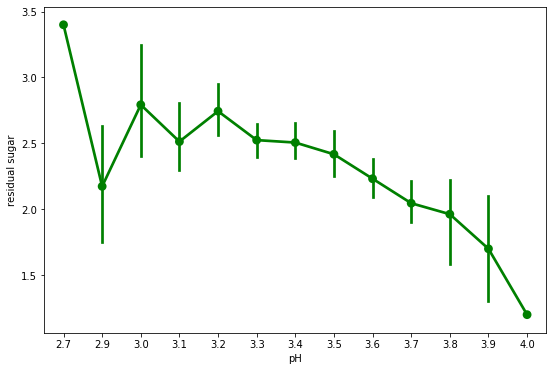

In [18]:
fig = plt.figure(figsize = (9,6))
sns.pointplot(x=data['pH'].round(1),y='residual sugar',color='green',data=data)
plt.show()

From the above point plot we can see various point estimates and confidence levels for residual sugar levels at different values of pH.

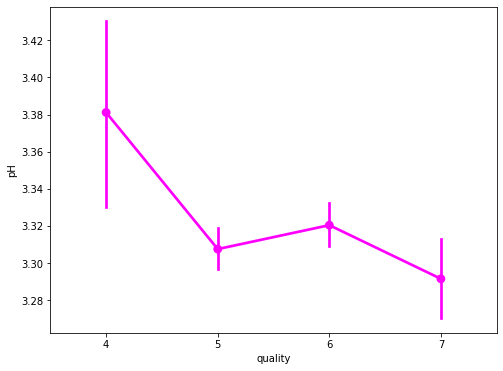

In [19]:
fig = plt.figure(figsize = (8,6))
sns.pointplot(y=data['pH'].round(1),x='quality',color='MAGENTA',data=data)
plt.show()

At different wine qualities the point estimates and confidence intervals for pH values are shown in the above point plot.

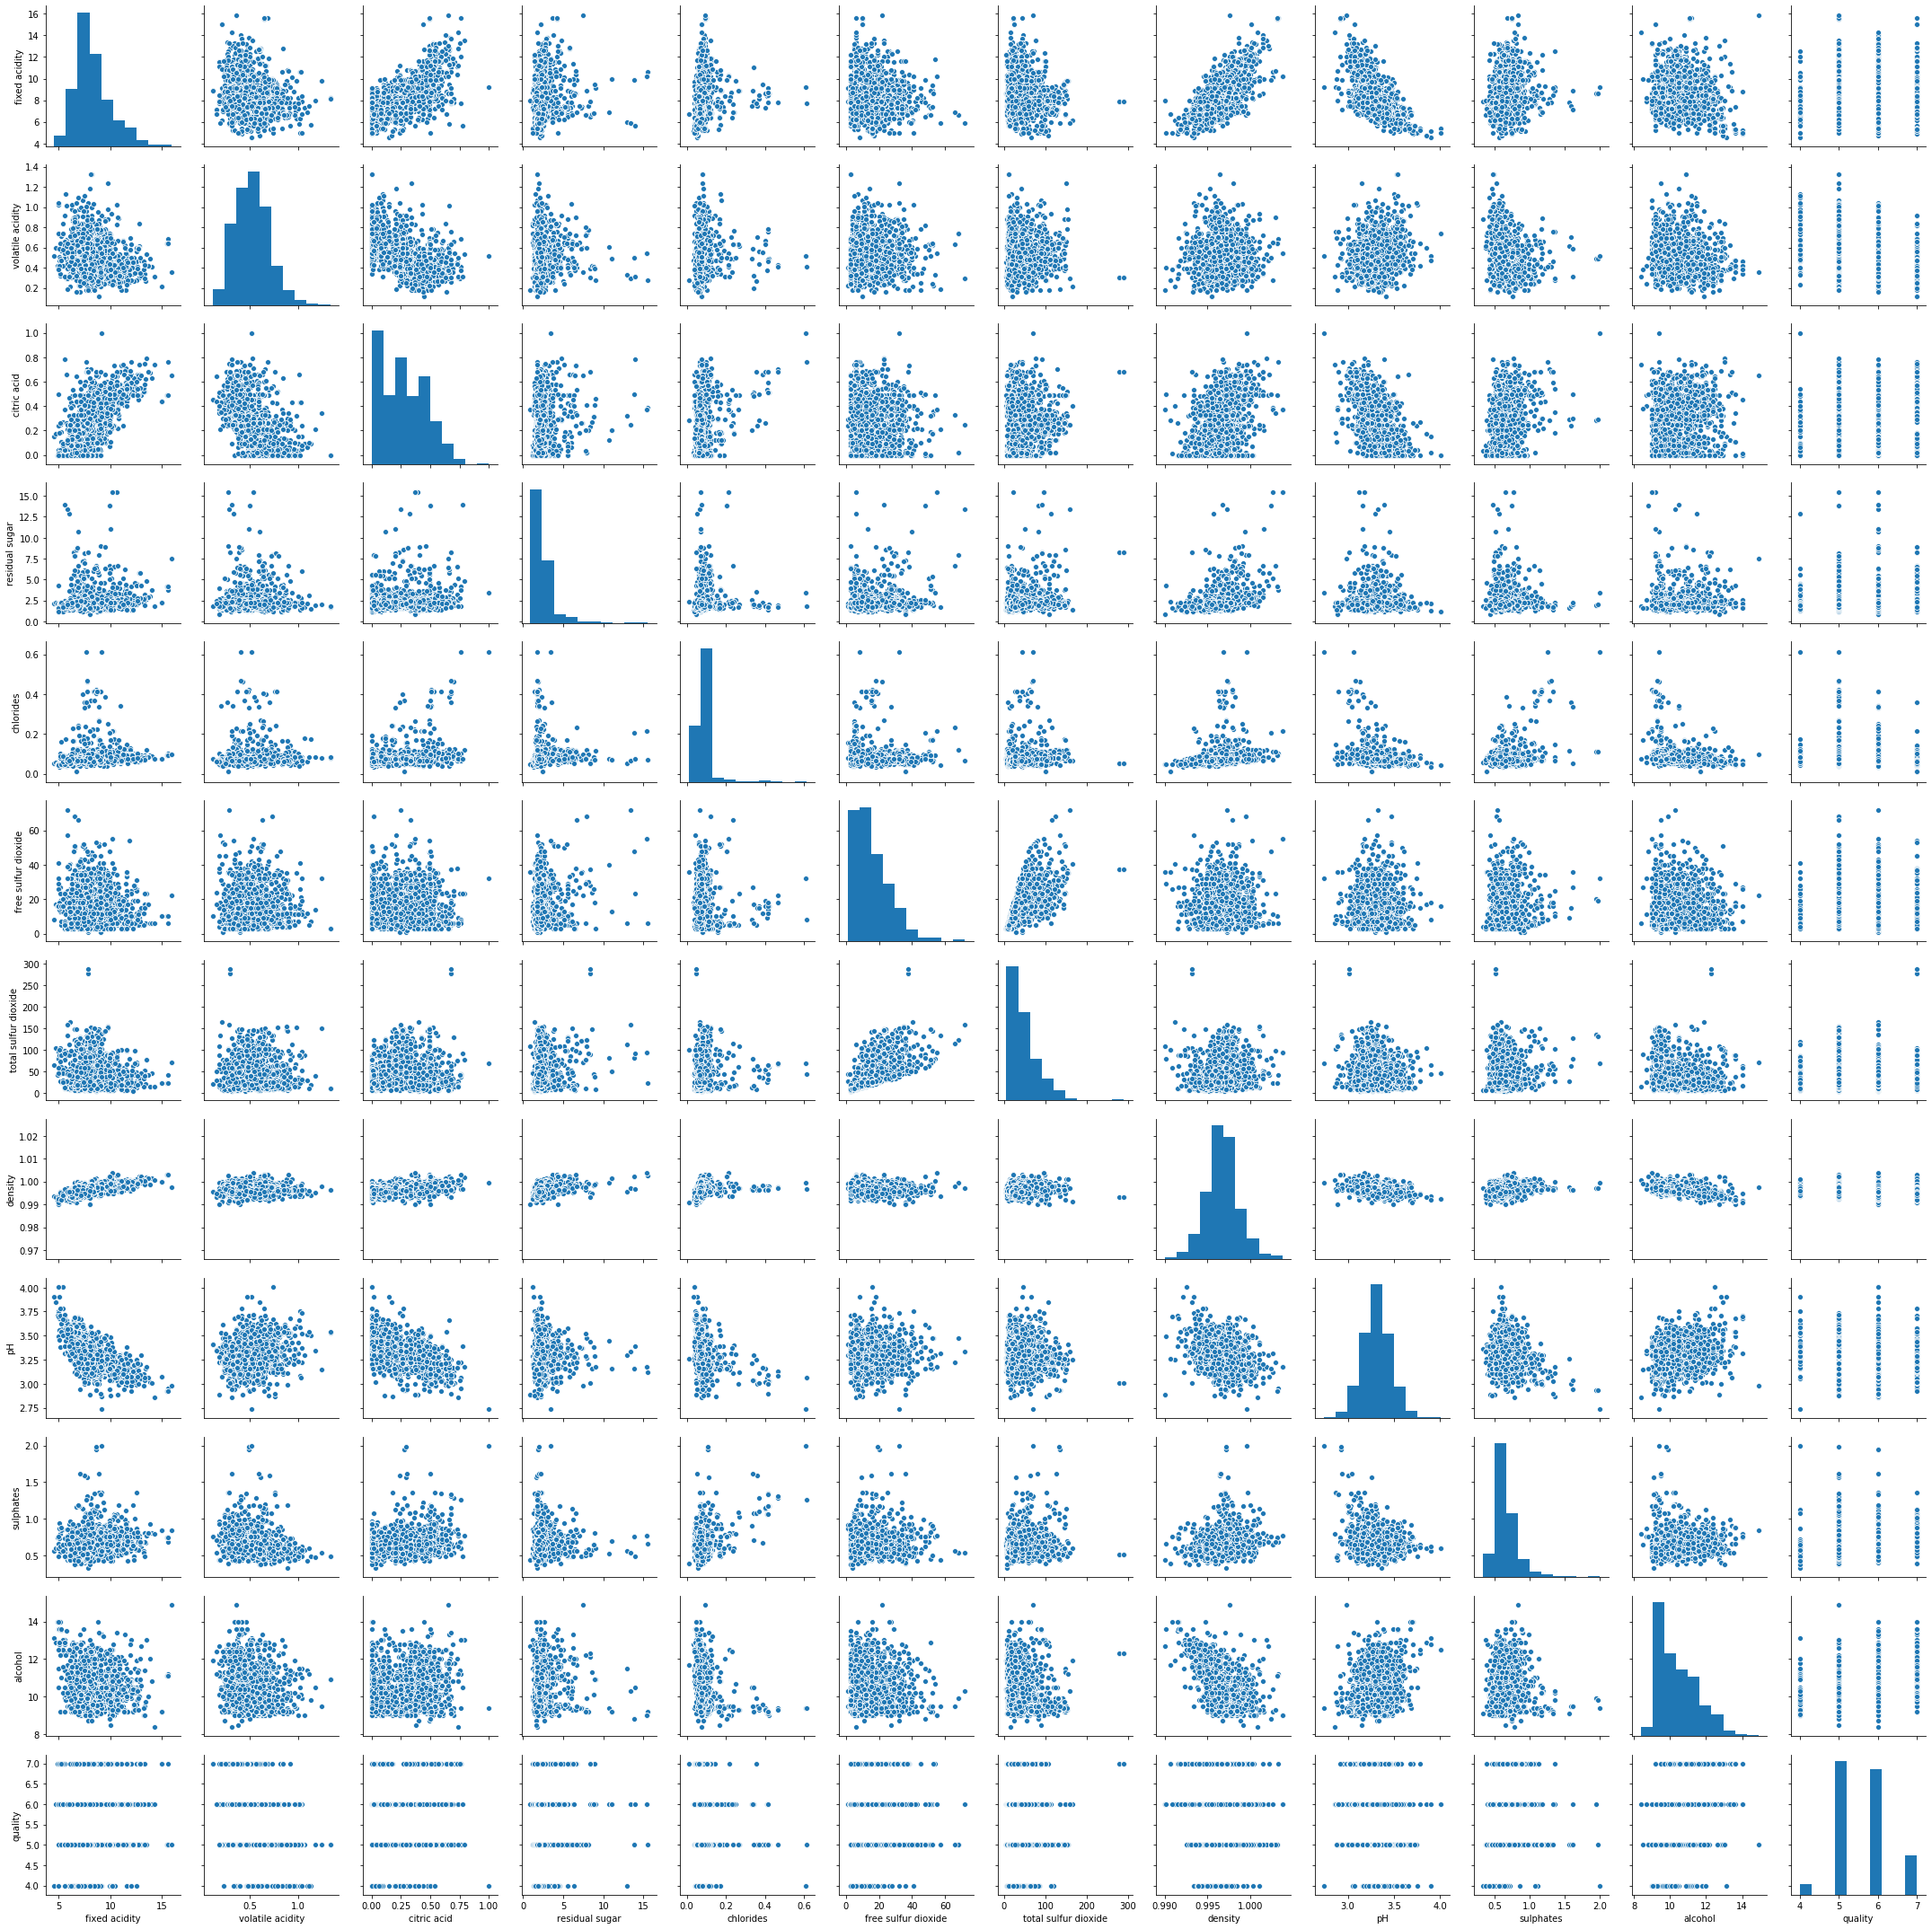

In [20]:
# Takes more run time can avoid this code if considered unnecessary. 
sns.pairplot(data)
plt.show()

In [21]:
corr=data.corr()

In [22]:
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.254979,0.668055,0.112726,0.093603,-0.153287,-0.110548,0.668446,-0.681691,0.185738,-0.056086,0.132455
volatile acidity,-0.254979,1.000000,-0.550466,-0.000938,0.054441,-0.002193,0.084952,0.023945,0.223166,-0.252713,-0.208159,-0.371912
citric acid,0.668055,-0.550466,1.000000,0.144541,0.210872,-0.058883,0.039963,0.365142,-0.536324,0.311397,0.111581,0.216625
residual sugar,0.112726,-0.000938,0.144541,1.000000,0.058815,0.196394,0.210238,0.355289,-0.087517,0.006907,0.038797,0.015644
chlorides,0.093603,0.054441,0.210872,0.058815,1.000000,0.005713,0.050730,0.200790,-0.269856,0.382763,-0.216637,-0.110691
free sulfur dioxide,-0.153287,-0.002193,-0.058883,0.196394,0.005713,1.000000,0.666647,-0.016526,0.070912,0.052165,-0.072443,-0.057308
total sulfur dioxide,-0.110548,0.084952,0.039963,0.210238,0.050730,0.666647,1.000000,0.076190,-0.070018,0.043404,-0.209803,-0.203880
density,0.668446,0.023945,0.365142,0.355289,0.200790,-0.016526,0.076190,1.000000,-0.341393,0.157177,-0.489172,-0.155828
pH,-0.681691,0.223166,-0.536324,-0.087517,-0.269856,0.070912,-0.070018,-0.341393,1.000000,-0.196786,0.205099,-0.040834
sulphates,0.185738,-0.252713,0.311397,0.006907,0.382763,0.052165,0.043404,0.157177,-0.196786,1.000000,0.086381,0.241592


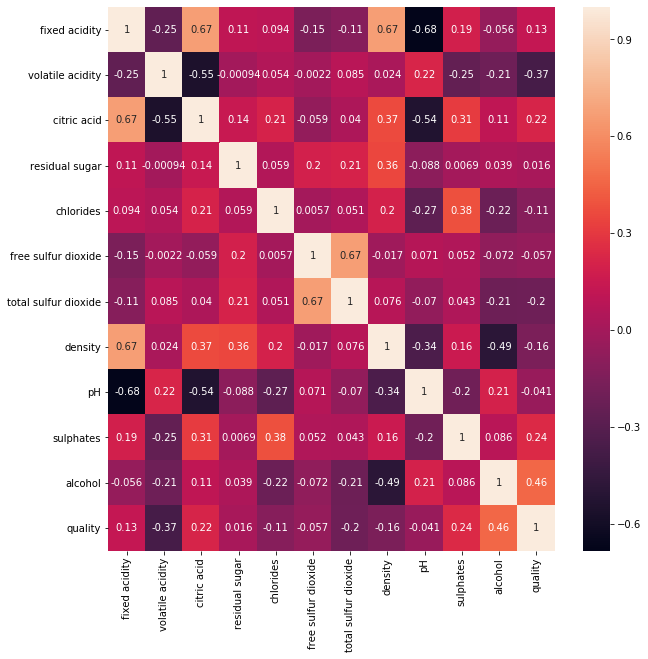

In [23]:
# Visualizing correlation
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()

## FITTING MODELS TO THE DATASET

### Models applying:


Logistic regression\
Linear SVM\
rbf SVM\
KNN\
Gaussian NB\
Decision Tree\
Random Forest\
Gradient Boosting


#### SPLITTING X AND Y VARIABLES

In [24]:
# SPLITING X AND Y VARIABLES
X=data.iloc[:,:-1]
y=data.iloc[:,11]

In [25]:
# A GLIMPSE OF X AND Y VARAIBLES
X.sample(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1476,9.9,0.50,0.50,13.8,0.205,48.0,82.0,1.00242,3.16,0.75,8.8
924,8.6,0.47,0.27,2.3,0.055,14.0,28.0,0.99516,3.18,0.80,11.2
591,6.6,0.39,0.49,1.7,0.070,23.0,149.0,0.99220,3.12,0.50,11.5


In [26]:
y.sample(3)

732     5
869     6
1083    6
Name: quality, dtype: int64

#### TRAINING AND TESTING DATASETS

In [27]:
# SPLITTING DATASET INTO TRAINING AND TESTING DATA
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [28]:
# SHAPE OF TRAINING AND TESTING DATA
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1099, 11)
(472, 11)
(1099,)
(472,)


### FITTING ALL MODELS AT THE SAME TIME

In [29]:
# Importing packages and functions required for fitting different models to the data
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier


# Importing functions to get the model fitting for the data 
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix  
from sklearn.model_selection import cross_val_score

####  Fitting all the models at the same time using 'for' loop and obtaining Confusion matrices,Accuracies

In [30]:
# Fitting all the models at the same time using 'for' loop
models=[LogisticRegression(multi_class="multinomial",solver="newton-cg"),
        LinearSVC(),
        SVC(kernel='rbf',gamma="auto"),
        KNeighborsClassifier(n_neighbors=10,metric="euclidean"),
        GaussianNB(),
        DecisionTreeClassifier(criterion="gini",max_depth=10),
        RandomForestClassifier(n_estimators=100),
        GradientBoostingClassifier()
        ]
model_names=['LogisticRegression',
             'LinearSVM',
             'rbfSVM',
             'KNearestNeighbors',
             'GaussianNB',
             'DecisionTree',
             'RandomForestClassifier',
             'GradientBoostingClassifier',
             ]
acc=[]

for model in range(len(models)):
    classification_model=models[model]
    classification_model.fit(X_train,y_train)
    y_pred=classification_model.predict(X_test)
    acc.append(accuracy_score(y_pred,y_test))
    print("confusion matrix of:",model_names[model],"\n",confusion_matrix(y_test,y_pred))  
d={'Modelling Algorithm':model_names,'Accuracy':acc}
acc_table=pd.DataFrame(d)
acc_table

confusion matrix of: LogisticRegression 
 [[  0   9   7   2]
 [  0 156  48   1]
 [  0  69 113   8]
 [  0   3  42  14]]
confusion matrix of: LinearSVM 
 [[  0  12   5   1]
 [  0 132  72   1]
 [  0  61 125   4]
 [  0   4  45  10]]
confusion matrix of: rbfSVM 
 [[  0  11   6   1]
 [  0 135  69   1]
 [  0  75 110   5]
 [  0  14  36   9]]
confusion matrix of: KNearestNeighbors 
 [[  1   8   7   2]
 [  1 138  63   3]
 [  0  97  86   7]
 [  0  16  33  10]]
confusion matrix of: GaussianNB 
 [[  1   9   6   2]
 [ 11 129  57   8]
 [ 12  43 107  28]
 [  1   4  26  28]]
confusion matrix of: DecisionTree 
 [[  2   9   5   2]
 [  2 128  64  11]
 [  3  51 120  16]
 [  0   8  29  22]]
confusion matrix of: RandomForestClassifier 
 [[  0  12   5   1]
 [  0 154  49   2]
 [  0  42 139   9]
 [  0   3  36  20]]
confusion matrix of: GradientBoostingClassifier 
 [[  0  13   4   1]
 [  3 151  50   1]
 [  1  47 130  12]
 [  0   2  34  23]]


,Modelling Algorithm,Accuracy
0,LogisticRegression,0.599576
1,LinearSVM,0.565678
2,rbfSVM,0.538136
3,KNearestNeighbors,0.497881
4,GaussianNB,0.561441
5,DecisionTree,0.576271
6,RandomForestClassifier,0.663136
7,GradientBoostingClassifier,0.644068


TABLE SHOWING EACH MODEL AND ITS CORRESPONDING ACCURACY SCORES.

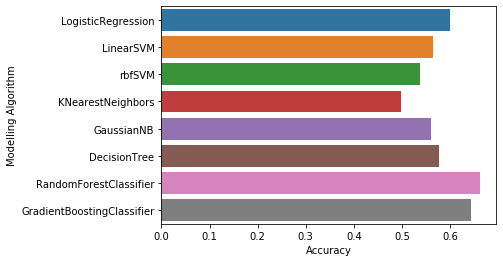

In [31]:
sns.barplot(y='Modelling Algorithm',x='Accuracy',data=acc_table)

Bar plot representing the acuracies of all the models applied.

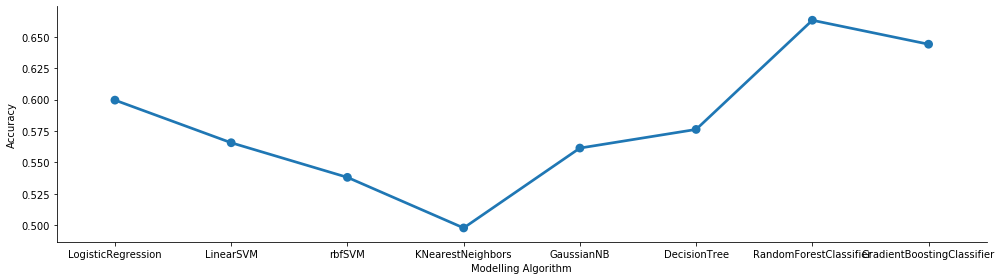

In [32]:
sns.catplot(x='Modelling Algorithm',y='Accuracy',data=acc_table,kind='point',height=4,aspect=3.5)
plt.show()

Cat plot representing accuracies for different models applied.

### Finding 10 fold cross validation scores for all the models at the same time using 'for' loop 

In [33]:
# Finding 10 fold cross validation scores for all the models at the same time using 'for' loop 
models=[LogisticRegression(multi_class="multinomial",solver="newton-cg"),
        LinearSVC(),
        SVC(kernel='rbf',gamma="auto"),
        KNeighborsClassifier(n_neighbors=10,metric="euclidean"),
        GaussianNB(),
        DecisionTreeClassifier(criterion="gini",max_depth=10),
        RandomForestClassifier(n_estimators=100),
        GradientBoostingClassifier()
        ]
model_names=['LogisticRegression',
             'LinearSVM',
             'rbfSVM',
             'KNearestNeighbors',
             'GaussianNB',
             'DecisionTree',
             'RandomForestClassifier',
             'GradientBoostingClassifier',
             ]
cvs=[]
for model in range(len(models)):
    classification_model=models[model]
    clf=classification_model.fit(X_train,y_train)
    scores = cross_val_score(clf, X_test, y_test, cv=10)
    scores.mean()
    print("10 fold cross validation of:",model_names[model],"\n",scores.mean())  


10 fold cross validation of: LogisticRegression 
 0.5704360674272791
10 fold cross validation of: LinearSVM 
 0.5173323311748381
10 fold cross validation of: rbfSVM 
 0.5301701099804708
10 fold cross validation of: KNearestNeighbors 
 0.4837970243601603
10 fold cross validation of: GaussianNB 
 0.4810738513721862
10 fold cross validation of: DecisionTree 
 0.5198442799876657
10 fold cross validation of: RandomForestClassifier 
 0.6067686812622057
10 fold cross validation of: GradientBoostingClassifier 
 0.5855266471374242


### PREDICTING A NEW OBSERVATION WITH ALL DIFFERENT MODELS WHOSE ACTUAL VALUE IS 5.

In [34]:
# prediction 
new_obs=[[9,0.580,0.25,2.8,0.075,9.0,104.0,0.99779,3.23,0.57,9.7]]
pv=[]
for model in range(len(models)):
    classification_model=models[model]
    models[model].predict(new_obs)
    pv.append(models[model].predict(new_obs))
    
d={'Modelling Algorithm':model_names,'Predicted value':pv}
pred_table=pd.DataFrame(d)
pred_table

,Modelling Algorithm,Predicted value
0,LogisticRegression,[5]
1,LinearSVM,[4]
2,rbfSVM,[6]
3,KNearestNeighbors,[5]
4,GaussianNB,[5]
5,DecisionTree,[5]
6,RandomForestClassifier,[5]
7,GradientBoostingClassifier,[5]


## **Conclusion:**

FROM ALL THE ABOVE VALUES WE SEE THAT **SUPPORT VECTOR MACHINE(RBF)**  PREDICTED WRONGLY.